In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('data.csv')
len(df)

11914

In [4]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
df.columns = df.columns.str.lower().str.replace(' ','_')
# df.head()

In [6]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
# strings

In [7]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ','_')

In [8]:
# df.head()

## 2.3 Exploratory data analysis

In [9]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48
model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914
year
[2011 2012 2013 1992 1993]


28
engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10
engine_hp
[335. 300. 230. 320. 172.]
356
engine_cylinders
[ 6.  4.  5.  8. 12.]
9
transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5
driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4
number_of_doors
[ 2.  4.  3. nan]
3
market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71
vehicle_size
['compact' 'midsize' 'large']
3
vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16
highway_mpg
[26 28 27 25 24]
59
city_mpg
[19 20 18 17 16]
69
popularity
[3916 3105  819  617 1013]
48
msrp
[46135 40650 36350 29450 34500]
6049


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# To make sure the graph can be displayed in jupyter notebook
%matplotlib inline

In [11]:
#sns.histplot(df.msrp[df.msrp < 100000], bins=50)
# Long tail distribution

In [12]:
len(df[df['msrp'] < 10000])

1647

This long tail distribution is not good for machine learning. The tail data would "confuse" the model. So we want to get rid of the long tail. What we usually do is logarithim transformation.

In [13]:
# log1p add 1 to each value to avoid the potential problem of log0
np.log1p([0, 1, 10, 1000, 10000])

array([0.        , 0.69314718, 2.39789527, 6.90875478, 9.21044037])

In [14]:
price_logs = np.log1p(df.msrp)
#price_logs

In [15]:
#sns.histplot(price_logs, bins=50)

### Missing values

In [16]:
#df.isnull().sum()

## 2.4 Setting up the validation framework

In [17]:
# Use 20% of the whole data set for validation and 20% for test
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [18]:
n_val, n_test, n_train

(2382, 2382, 7150)

In [19]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [20]:
#df_val.head()

In [21]:
idx = np.arange(n)

In [22]:
np.random.seed(2)
np.random.shuffle(idx)

In [23]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [24]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [25]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [26]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [27]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [28]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978], shape=(7150,))

In [29]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

## 2.5 Linear regression

In [30]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [31]:
xi = [453, 11, 86]

In [32]:
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [33]:
def linear_regression(xi):
    n = len(xi) # Number of features

    pred = w0

    for j in range(n):
        pred = pred + w[j] * xi[j]

    return pred

In [34]:
linear_regression(xi)

12.312

In [35]:
np.exp(12.312) - 1
# this is equivalent to np.expm1(12.312)
np.expm1(12.312)

np.float64(222347.2221101062)

2.6 Linear regression vector form

In [36]:
def dot(xi, w):
    n = len(xi)

    res = 0.0

    for j in range(n):
        res = res + xi[j] * w[j]

    return res

In [37]:
w_new = [w0] + w
w_new

[7.17, 0.01, 0.04, 0.002]

In [38]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [39]:
linear_regression(xi)

12.312

In [40]:
xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [41]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [42]:
def linear_regression(X):
    return X.dot(w_new)

linear_regression(X)

array([12.38 , 13.552, 12.312])

## 2.7 Training a linear regression model

In [43]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 285],
    [172, 25, 201],
    [413, 11, 86],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86],
]
X = np.array(X)
X


array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  285],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [44]:
ones = np.ones(X.shape[0])
X = np.column_stack([ones, X])

In [45]:
# Gram matrix
XTX = X.T.dot(X)
XTX

array([[9.000000e+00, 2.109000e+03, 2.300000e+02, 4.776000e+03],
       [2.109000e+03, 6.964710e+05, 4.411500e+04, 7.343400e+05],
       [2.300000e+02, 4.411500e+04, 7.146000e+03, 1.212030e+05],
       [4.776000e+03, 7.343400e+05, 1.212030e+05, 6.406986e+06]])

In [46]:
XTX_inv = np.linalg.inv(XTX)

In [47]:
XTX.dot(XTX_inv).round(1)

array([[ 1., -0., -0., -0.],
       [ 0.,  1., -0., -0.],
       [-0.,  0.,  1.,  0.],
       [ 0., -0., -0.,  1.]])

In [48]:
y = [100, 200, 150, 250, 100, 200, 150, 250, 120]

In [49]:
w_full = XTX_inv.dot(X.T).dot(y)

In [50]:
w0 = w_full[0]
w = w_full[1:]
w0, w

(np.float64(298.26042150081685),
 array([-0.22470334, -2.55531445, -0.02150798]))

In [51]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 285],
    [172, 25, 201],
    [413, 11, 86],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86],
]
X = np.array(X)
train_linear_regression(X,y)

    

(np.float64(298.26042150081685),
 array([-0.22470334, -2.55531445, -0.02150798]))

## 2.8 Car price baseline model

In [52]:
df_train.dtypes
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [53]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 
        'city_mpg', 'popularity']

df_train[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33,24,1385
1,132.0,4.0,32,25,2031
2,148.0,4.0,37,28,640
3,90.0,4.0,18,16,873
4,385.0,8.0,21,15,5657
...,...,...,...,...,...
7145,300.0,6.0,31,20,3916
7146,210.0,4.0,30,24,873
7147,285.0,6.0,22,17,549
7148,563.0,12.0,21,13,86


In [54]:
X_train = df_train[base].values

In [55]:
df_train[base].isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [56]:
# Dealing with null values
X_train = df_train[base].fillna(0).values
# Fillling all the null values with 0. In this way we just ignor the corresponding feature.

In [57]:
w0, w = train_linear_regression(X_train, y_train)

In [58]:
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

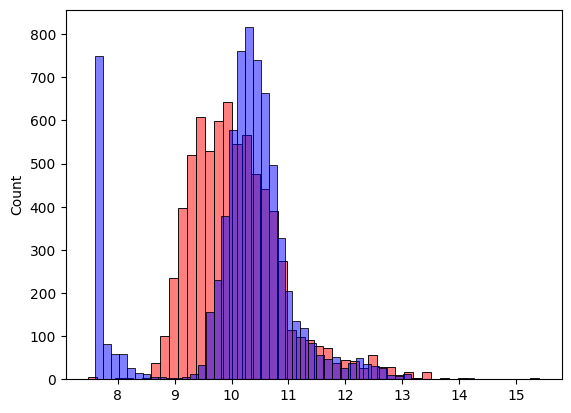

In [59]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

## 2.9 RMSE

In [60]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [61]:
rmse(y_train, y_pred)

np.float64(0.7554192603920132)

## 2.10 Validating the model

In [62]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 
        'city_mpg', 'popularity']
X_train = df_train[base].fillna(0).values
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w)

In [63]:
def prepare_X(df):
    df_num = df[base].fillna(0)
    X = df_num.values
    return X

In [64]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.7616530991301627)

## 2.11 Simple feature engineering

In [65]:
2017 - df_train.year

0        9
1        5
2        1
3       26
4        0
        ..
7145     2
7146     2
7147     2
7148     3
7149     0
Name: year, Length: 7150, dtype: int64

In [66]:
# Add a new featrue "age" to the model

def prepare_X(df):
    df = df.copy()

    df['age'] = 2017 - df.year 
    # Without df = df.copy() this function would change the data df itself. Since
    # we don't want the function to change our data set, we make a copy inside the
    # function and do things to this copy.
         
    features = base + ['age']
    df_num = df[features].fillna(0)
    X = df_num.values
    return X

In [67]:
X_train = prepare_X(df_train)

In [68]:
X_train

array([[1.480e+02, 4.000e+00, 3.300e+01, 2.400e+01, 1.385e+03, 9.000e+00],
       [1.320e+02, 4.000e+00, 3.200e+01, 2.500e+01, 2.031e+03, 5.000e+00],
       [1.480e+02, 4.000e+00, 3.700e+01, 2.800e+01, 6.400e+02, 1.000e+00],
       ...,
       [2.850e+02, 6.000e+00, 2.200e+01, 1.700e+01, 5.490e+02, 2.000e+00],
       [5.630e+02, 1.200e+01, 2.100e+01, 1.300e+01, 8.600e+01, 3.000e+00],
       [2.000e+02, 4.000e+00, 3.100e+01, 2.200e+01, 8.730e+02, 0.000e+00]],
      shape=(7150, 6))

In [69]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.5172055461058327)

<Axes: ylabel='Count'>

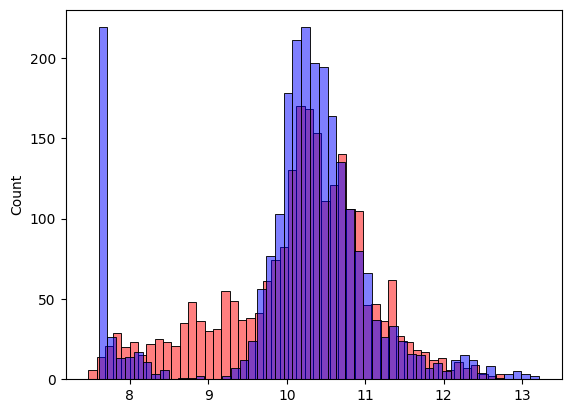

In [70]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_val, color='blue', alpha=0.5, bins=50)

## 2.12 Categorical variables

In [71]:
""" df_train['num_doors_2'] = (df_train.number_of_doors == 2).astype('int')
df_train['num_doors_3'] = (df_train.number_of_doors == 3).astype('int')
df_train['num_doors_4'] = (df_train.number_of_doors == 4).astype('int') """
# Alternatively, we can write a loop:
for v in [2, 3, 4]:
    df_train['num_doors_%s' % v] = (df_train.number_of_doors == v).astype('int')


In [72]:
def prepare_X(df):
    df = df.copy()
    features = base.copy() 
    # If we use feature = base here, later when we append 'age' to features it will also 
    # change base. Using .copy() would avoid this.

    df['age'] = 2017 - df.year 
    features.append('age')

    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)

    df_num = df[features].fillna(0)
    X = df_num.values
    return X

In [73]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.5157995641501902)

In [74]:
makes = list(df.make.value_counts().head().index)

In [75]:
def prepare_X(df):
    df = df.copy()
    features = base.copy() 
    # If we use feature = base here, later when we append 'age' to features it will also 
    # change base. Using .copy() would avoid this.

    df['age'] = 2017 - df.year 
    features.append('age')

    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)

    for v in makes:
        df['makes_%s' % v] = (df.make == v).astype('int')
        features.append('makes_%s' % v)

    df_num = df[features].fillna(0)
    X = df_num.values
    return X

In [76]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.5076038849556633)

In [77]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [78]:
categories_variables = [
    'make', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 
    'market_category', 'vehicle_size', 'vehicle_style'
]

In [79]:
categories = {}

for c in categories_variables:
    categories[c] = list(df[c].value_counts().head().index)

In [80]:
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [81]:
def prepare_X(df):
    df = df.copy()
    features = base.copy() 
    # If we use feature = base here, later when we append 'age' to features it will also 
    # change base. Using .copy() would avoid this.

    df['age'] = 2017 - df.year 
    features.append('age')

    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)

    for c, values in categories.items():
        for v in values:
            df['%s_%s' % (c, v)] = (df[c] == v).astype('int')
            features.append('%s_%s' % (c, v))

    df_num = df[features].fillna(0)
    X = df_num.values
    return X

In [82]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(20.255338567164987)

In [83]:
w0

np.float64(150710170147060.28)

## 2.13 Regularizaton

In [84]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5.0000001]
]

X = np.array(X)
X

array([[4.       , 4.       , 4.       ],
       [3.       , 5.       , 5.       ],
       [5.       , 1.       , 1.       ],
       [5.       , 4.       , 4.       ],
       [7.       , 5.       , 5.       ],
       [4.       , 5.       , 5.0000001]])

In [85]:
XTX = X.T.dot(X)
XTX.shape

(3, 3)

In [86]:
XTX_inv = np.linalg.inv(XTX)

In [87]:
y = [1, 2, 3, 1, 2, 3]
XTX_inv.shape

(3, 3)

In [88]:
XTX_inv.dot(X.T).dot(y)

array([ 3.25115862e-01, -4.41093100e+06,  4.41093113e+06])

In [89]:
XTX = [
    [1, 2, 2],
    [2, 1, 1.0000001],
    [2, 1.0000001, 1],
]
XTX = np.array(XTX)

In [90]:
np.linalg.inv(XTX)

array([[-3.33333356e-01,  3.33333339e-01,  3.33333339e-01],
       [ 3.33333339e-01, -5.00000008e+06,  4.99999991e+06],
       [ 3.33333339e-01,  4.99999991e+06, -5.00000008e+06]])

In [91]:
XTX = XTX + 0.01 * np.eye(3)

In [92]:
np.linalg.inv(XTX)

array([[ -0.33668908,   0.33501399,   0.33501399],
       [  0.33501399,  49.91590897, -50.08509104],
       [  0.33501399, -50.08509104,  49.91590897]])

In [93]:
def train_linear_regression(X,y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)

    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [94]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train, r=0.001)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.4565175088332509)

## 2.14 Tuning the model

To choose the best regulation parameter.

In [95]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression(X_train, y_train, r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)
    
    print(r, w0, score)

0.0 150710170147060.28 20.255338567164987
1e-05 8.157274761035366 0.4565170157295475
0.0001 6.275543842862297 0.4565170637796298
0.001 6.285496210990604 0.4565175088332509
0.1 6.1912086909259 0.45656927630050337
1 5.634896668332636 0.457220431799526
10 4.283980108969942 0.47014569321004196


In [96]:
r = 0.001
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train, r=r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
score

np.float64(0.4565175088332509)

## 2.15 Using the model

In [97]:
df_full_train = pd.concat([df_train, df_val])

In [100]:
df_full_train = df_full_train.reset_index(drop=True)

In [102]:
X_full_train = prepare_X(df_full_train)

In [103]:
X_full_train

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   0.]], shape=(9532, 41))

In [105]:
y_full_train = np.concatenate([y_train, y_val])

In [106]:
w0, w = train_linear_regression(X_full_train, y_full_train, r=0.001)

In [108]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

np.float64(0.4517749307153303)

In [111]:
car = df_test.iloc[20].to_dict()
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [114]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031


In [117]:
X_small = prepare_X(df_small)
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
y_pred

np.float64(10.462651714052047)

In [118]:
np.expm1(y_pred)

np.float64(34983.19664419248)

In [119]:
np.expm1(y_test[20])

np.float64(35000.00000000001)